<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_deaths_do_nothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
deaths = pd.read_csv("https://covid.ourworldindata.org/data/total_deaths.csv", index_col='date')

In [3]:
deaths[["France", "Italy", "Spain"]].tail(3)

,France,Italy,Spain
date,,,
2020-03-15,91.0,1441.0,136.0
2020-03-16,127.0,1809.0,288.0
2020-03-17,148.0,2503.0,309.0


In [0]:
list_countries = ["France", "Italy", "Spain"]

In [0]:
TIPPING_POINT = 10

In [0]:
NEXT = 14

In [0]:
France_lockdown = '2020-03-18'
Italy_lockdown = '2020-03-10'
Spain_lockdown = '2020-03-15'

In [0]:
deaths_country = {}
for country in list_countries:
  deaths_country[country] = deaths[country][deaths[country]> TIPPING_POINT]

In [9]:
France_gap = (pd.to_datetime(France_lockdown) - pd.to_datetime(deaths_country["France"].keys()[0])).days
Italy_gap = (pd.to_datetime(Italy_lockdown) - pd.to_datetime(deaths_country["Italy"].keys()[0])).days
Spain_gap = (pd.to_datetime(Spain_lockdown) - pd.to_datetime(deaths_country["Spain"].keys()[0])).days
France_gap, Italy_gap, Spain_gap

(9, 13, 5)

In [0]:
x_trn_FR = np.arange(France_gap)
x_trn_ES = np.arange(Spain_gap)
x_trn_IT = np.arange(Italy_gap)

In [0]:
x_trn_FR = x_trn_FR[...,None]
x_trn_ES = x_trn_ES[...,None]
x_trn_IT = x_trn_IT[...,None]

In [0]:
y_trn_FR = np.log(np.array(deaths_country["France"].iloc[:France_gap]))
y_trn_ES = np.log(np.array(deaths_country["Spain"].iloc[:Spain_gap]))
y_trn_IT = np.log(np.array(deaths_country["Italy"].iloc[:Italy_gap]))

In [0]:
x = np.arange(len(deaths_country["Italy"]))
x = x[...,None]

In [0]:
x_next_FR = np.arange(len(deaths_country["France"]), len(deaths_country["France"])+NEXT)
x_next_IT = np.arange(len(deaths_country["Italy"]), len(deaths_country["Italy"])+NEXT)
x_next_ES = np.arange(len(deaths_country["Spain"]), len(deaths_country["Spain"])+NEXT)

In [0]:
x_next_FR = x_next_FR[..., None]
x_next_IT = x_next_IT[..., None]
x_next_ES = x_next_ES[..., None]

In [0]:
from sklearn.linear_model import LinearRegression

lm_FR = LinearRegression()
lm_FR.fit(x_trn_FR, y_trn_FR)
preds_FR = np.exp(lm_FR.predict(x))
preds_next_FR = np.exp(lm_FR.predict(x_next_FR))

In [0]:
lm_ES = LinearRegression()
lm_ES.fit(x_trn_ES, y_trn_ES)
preds_ES = np.exp(lm_ES.predict(x))
preds_next_ES = np.exp(lm_ES.predict(x_next_ES))

In [0]:
lm_IT = LinearRegression()
lm_IT.fit(x_trn_IT, y_trn_IT)
preds_IT = np.exp(lm_IT.predict(x))
preds_next_IT = np.exp(lm_IT.predict(x_next_IT))

In logarithmic scale:

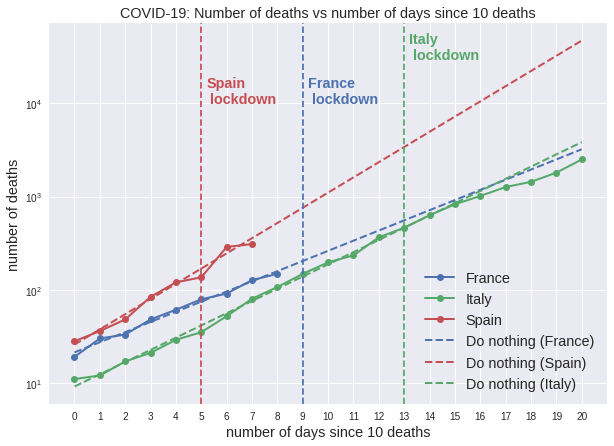

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  ax.plot(np.arange(len(deaths_country[country])),deaths_country[country], label=country, linewidth=2, marker='o')
ax.plot(x, preds_FR, label="Do nothing (France)", linewidth=2, color='C0', linestyle='dashed')
ax.plot(x, preds_ES, label="Do nothing (Spain)", linewidth=2, color='C2', linestyle='dashed')
ax.plot(x, preds_IT, label="Do nothing (Italy)", linewidth=2, color='C1', linestyle='dashed')
ax.axvline(Spain_gap, color='C2', linestyle='dashed')
ax.axvline(Italy_gap, color='C1', linestyle='dashed')
ax.axvline(France_gap, color='C0', linestyle='dashed')
ax.annotate('Spain\n lockdown', (Spain_gap, 10000.0), xytext=(Spain_gap+0.2,10000.0), color='C2', fontsize='x-large', fontweight='bold')
ax.annotate('Italy\n lockdown', (Italy_gap, 30000.0), xytext=(Italy_gap+0.2,30000.0), color='C1', fontsize='x-large', fontweight='bold')
ax.annotate('France\n lockdown', (France_gap, 10000.0), xytext=(France_gap+0.2,10000.0), color='C0', fontsize='x-large', fontweight='bold')
ax.set_title(f'COVID-19: Number of deaths vs number of days since {TIPPING_POINT} deaths', fontsize='x-large')
ax.set_xlabel(f'number of days since {TIPPING_POINT} deaths', fontsize='x-large')
ax.set_ylabel(f'number of deaths', fontsize='x-large')
ax.set_xticks(np.arange(len(deaths_country["Italy"])))
ax.set_yscale("log")
ax.legend(fontsize='x-large')
plt.show()

In [20]:
print(f"Slope for France: {lm_FR.coef_[0]:.2f}")
print(f"Slope for Italy: {lm_IT.coef_[0]:.2f}")
print(f"Slope for Spain: {lm_ES.coef_[0]:.2f}")

Slope for France: 0.25
Slope for Italy: 0.30
Slope for Spain: 0.38


In [21]:
for i, prediction in enumerate(preds_next_FR):
  print(f"{(pd.to_datetime(deaths['France'].tail(1).keys()) + \
            pd.DateOffset(i+1)).strftime('%B %d')[0]}: {int(prediction)}")

March 18: 203
March 19: 261
March 20: 336
March 21: 432
March 22: 555
March 23: 714
March 24: 918
March 25: 1180
March 26: 1518
March 27: 1951
March 28: 2508
March 29: 3224
March 30: 4144
March 31: 5328


In [22]:
for i, prediction in enumerate(preds_next_IT):
  print(f"{(pd.to_datetime(deaths['Italy'].tail(1).keys()) + \
            pd.DateOffset(i+1)).strftime('%B %d')[0]}: {int(prediction)}")

March 18: 5198
March 19: 7032
March 20: 9512
March 21: 12866
March 22: 17404
March 23: 23542
March 24: 31844
March 25: 43074
March 26: 58264
March 27: 78812
March 28: 106605
March 29: 144200
March 30: 195052
March 31: 263838


In [23]:
for i, prediction in enumerate(preds_next_ES):
  print(f"{(pd.to_datetime(deaths['Spain'].tail(1).keys()) + \
            pd.DateOffset(i+1)).strftime('%B %d')[0]}: {int(prediction)}")

March 18: 521
March 19: 758
March 20: 1104
March 21: 1608
March 22: 2342
March 23: 3410
March 24: 4966
March 25: 7232
March 26: 10530
March 27: 15334
March 28: 22329
March 29: 32514
March 30: 47345
March 31: 68940
